In [146]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [161]:
data = pd.read_csv(
    'Datasets/real_estate_dataset.csv'
)
# data = data.drop(data.columns[5:8], axis = 1)
# data = data.drop(data.columns[6], axis = 1) 
# data = data.drop(data.columns[6], axis = 1) 
# X_train = (data[data.columns[1:7]][:400])
# X_test = np.array(data[data.columns[1:7]][400:])
# X_train
data = data.drop(data.columns[3:11], axis = 1)
data

,ID,Square_Feet,Num_Bedrooms,Price
0,1,143.635030,1,602134.816747
1,2,287.678577,1,591425.135386
2,3,232.998485,1,464478.696880
3,4,199.664621,5,583105.655996
4,5,89.004660,4,619879.142523
...,...,...,...,...
495,496,138.338057,2,488496.350722
496,497,195.914028,2,657736.921717
497,498,69.433659,1,405324.950201
498,499,293.598702,5,773035.968028


In [162]:
X_train = np.array(data[data.columns[1: data.shape[1] - 1]][:400])
for i in range(X_train.shape[1]):
    X_train[:, i] = X_train[:, i] / max(X_train[:, i])
y_train = np.array(data[data.columns[data.shape[1] - 1]][:400]) 
# y_train = y_train / max(y_train)
X_test = np.array(data[data.columns[1:data.shape[1] - 1]][400:])
for i in range(X_test.shape[1]):
    X_test[:, i] = X_test[:, i] / max(X_test[:, i])
y_test = np.array(data[data.columns[data.shape[1] - 1]])[400:]
# y_test = y_test / max(y_test)
X_test

array([[0.25409289, 0.8       ],
       [0.92421244, 0.2       ],
       [0.59117618, 0.4       ],
       [0.86042561, 0.6       ],
       [0.43593038, 0.4       ],
       [0.91831983, 0.4       ],
       [0.49389695, 0.6       ],
       [0.17673418, 0.4       ],
       [0.9265839 , 0.6       ],
       [0.24417039, 0.2       ],
       [0.43531346, 0.6       ],
       [0.9640368 , 0.6       ],
       [0.9644938 , 0.8       ],
       [0.64833253, 0.6       ],
       [0.69728563, 0.6       ],
       [0.54355797, 0.2       ],
       [0.4134328 , 0.8       ],
       [0.44315184, 1.        ],
       [0.73138659, 0.2       ],
       [0.79832576, 0.2       ],
       [0.83118886, 1.        ],
       [0.82954513, 0.6       ],
       [0.24410285, 0.4       ],
       [0.58209623, 0.8       ],
       [0.21589804, 0.4       ],
       [0.62829086, 1.        ],
       [0.53776147, 0.2       ],
       [0.91176553, 0.2       ],
       [0.46180324, 0.8       ],
       [0.2657807 , 0.2       ],
       [0.

In [163]:
b = 1
w = np.ones(X_train.shape[1])
m = X_train.shape[0]

In [164]:
def costs(w, b, X_train, y_train, m):
    cost = 0
    var1 = np.zeros(X_train.shape[1])
    var2 = 0
    for j in range(X_train.shape[0]):
        fxij = np.dot(X_train[j, :], w) + b
        loss = (fxij - y_train[j]) ** 2
        cost += loss
        for i in range(X_train.shape[1]):
            var1[i] += (fxij - y_train[j]) * X_train[j, i]
        var2 += fxij - y_train[j]
    cost = cost / 2 / m
    var1 = var1 / m
    var2 = var2 / m
    return cost, var1, var2

In [165]:
def gradientDescent(w, b, m, X_train, y_train):
    alpha = 0.001
    iterations = 5000
    wn = w
    bn = b
    for i in range(iterations):
        cost, var1, var2 = costs(wn, bn, X_train, y_train, m)
        for j in range(X_train.shape[1]):
                wn[j] = wn[j] - alpha * var1[j]
        bn = bn - alpha * var2
        print(f"iteration : {i} cost : {cost}")    
    return wn, bn

In [166]:
wn, bn = gradientDescent(w, b, m, X_train, y_train)

iteration : 0 cost : 177104242909.63672
iteration : 1 cost : 176504960901.64032
iteration : 2 cost : 175907740314.97263
iteration : 3 cost : 175312574058.45834
iteration : 4 cost : 174719455065.31528
iteration : 5 cost : 174128376293.07083
iteration : 6 cost : 173539330723.4781
iteration : 7 cost : 172952311362.43216
iteration : 8 cost : 172367311239.8878
iteration : 9 cost : 171784323409.7765
iteration : 10 cost : 171203340949.92358
iteration : 11 cost : 170624356961.96667
iteration : 12 cost : 170047364571.27277
iteration : 13 cost : 169472356926.85764
iteration : 14 cost : 168899327201.30438
iteration : 15 cost : 168328268590.68167
iteration : 16 cost : 167759174314.46304
iteration : 17 cost : 167192037615.44736
iteration : 18 cost : 166626851759.6775
iteration : 19 cost : 166063610036.36072
iteration : 20 cost : 165502305757.78918
iteration : 21 cost : 164942932259.26114
iteration : 22 cost : 164385482898.99945
iteration : 23 cost : 163829951058.07556
iteration : 24 cost : 16327633

In [167]:
y_pred = np.array([])
for i in range(X_test.shape[0]):
    y_pred = np.append(y_pred, [np.dot(X_test[i, :], wn) + bn])

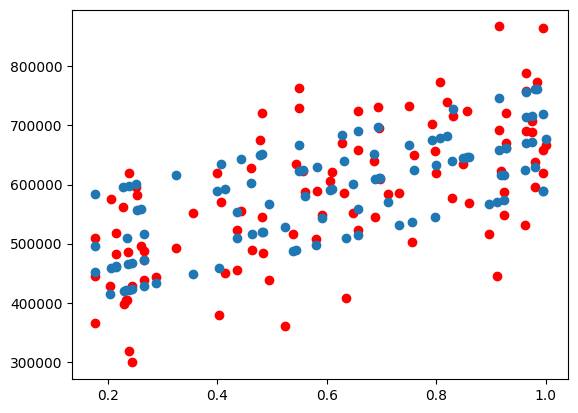

In [168]:
plt.scatter(X_test[:, 0], y_test, color = 'red')
plt.scatter(X_test[:, 0], y_pred)
plt.show()